<a href="https://colab.research.google.com/github/mapzine123/machine-running/blob/main/%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94_%EB%89%B4%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퍼셉트론 알고리즘
이진 분류 문제에서 최적의 가중치를 학습하는 알고리즘  
`이진 분류` : 임의의 샘플 데이터를 True나 False로 구분하는 문제

`선형함수` : `w1x1 + w2x2 + b = z`

```
# 계단 함수
if(z > 0) {
  y = 1 # 양성 클래스
} else {
  y = -1 # 음성 클래스
}
```

# 정리
선형 함수를 통과한 값 z를 계단 함수로 보내 0보다 큰지, 작은지 검사해 1과 -1로 분류하는 알고리즘

# 아달린 (적응형 선형 뉴런)
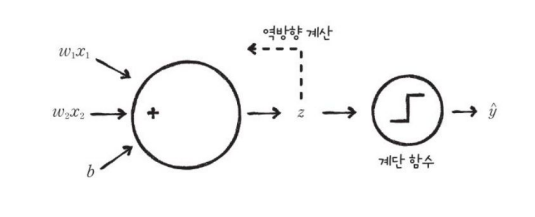

역방향 계산이 계단 함수 출력 이후에 일어나지 않고, 선형 함수 출력 이후에 진행되는게 특징

# 로지스틱 회귀

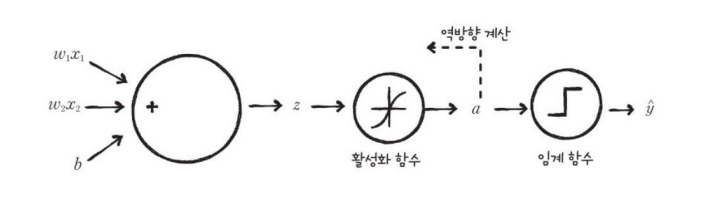

선형 함수를 통과시켜 얻은 z를 임계 함수에 보내기 전에 `활성화 함수(activation aunction)`으로 변형시킴
a = 활성화 함수를 통과한 값

`임계함수`는 아달린과 퍼셉트론의 계단 함수와 비슷한 역할을 하지만, 활성화 함수의 출력값을 사용한다는 점이 다름

## 활성화 함수는 비선형 함수를 사용함
`선형 함수` : 그래프를 그렸을때 직선의 형태를 갖는 함수 (함수값 예측이 쉬움)
`비선형 함수` : 그래프를 그렸을 때 직선의 형태를 갖지 않는 함수 (함수값 예측이 어려움)

# 시그모이드 함수
선형 함수 출력값 z를 0~1 사이의 확률값으로 변환해주는 함수

# 가중치 업데이트 방법
## `w[i] + (y - a)x[i]`

# 절편 업데이트 방법
## `b + (y-a)`

# 정리
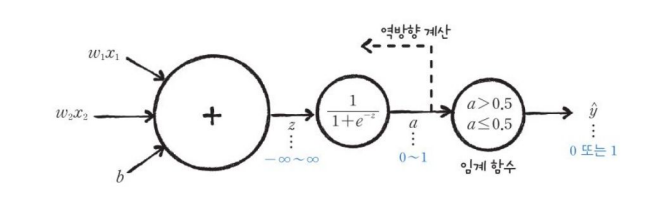

로지스틱 회귀는 이진 분류가 목표이므로 -∞ ~ ∞ 의 범위를 가지는 z의 값을 조절할 방법이 필요해 시그모이드 함수를 활성화 함수로 사용  
시그모이드 함수를 사용하면 z를 확률처럼 해석할 수 있기 때문  
그렇게 온 시그모이드 함수의 확률인 a를 0과 1로 구분하기 위해 임계 함수 사용  
결과 입력 데이터 x는 0 or 1의 값으로 나누어짐


# 실습 (유방암 데이터)

(569, 30) (569,)


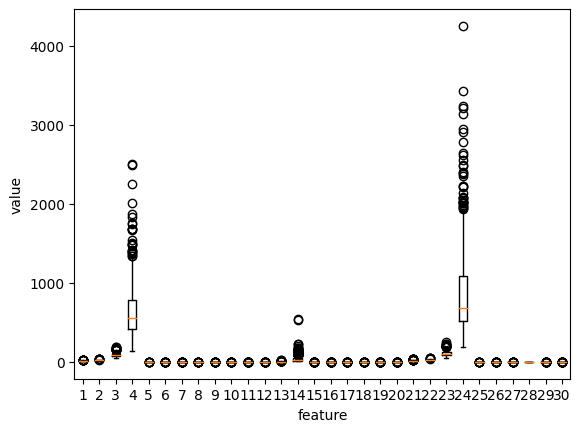

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

# 박스 플롯으로 특성의 사분위 관찰
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

## 박스플롯?
데이터의 대략적인 분포와 개별적인 이상치들을 동시에 보여줄 수 있음  
서로 다른 데이터 뭉치를 쉽게 비교할 수 있도록 도와주는 시각화 형태

그래프를 보면 4, 14, 24번 feature가 다른 특성보다 값의 분포가 크다는 걸 알 수 있음

In [2]:
cancer.feature_names[[3, 13, 23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

## 타겟 데이터 확인하기
우리가 해결할 문제는 음성 샘플(정상 종양)과 양성 샘플(악성 종양)을 구분하는 이진분류 문제임

cancer.target 배열 안에는 0(음성 클래스)과 1(양성 클래스)만 들어있음

In [3]:
np.unique(cancer.target, return_counts=True)
# unique 함수는 고유한 값을 찾아 반환함
# cancer.target의 고유한 값은 0, 1임

(array([0, 1]), array([212, 357]))

## 훈련 데이터 세트 저장하기


In [4]:
x = cancer.data
y = cancer.target

## 모델 성능 평가
훈련된 모델이 실전에서 얼마나 좋은 성능을 내는지는 어떻게 판단할 것인가?  
만약 훈련 데이터로 테스트를 하면 어떨까?  
만약 모델이 훈련 데이터 세트를 몽땅 외워버렸다면? (이런 알고리즘도 있다고 함)

훈련된 모델의 실전 성능을 `일반화 성능`이라고 부름  
만약 훈련 데이터로 테스트를 하면 당연히 좋은 성능이 나올 것임  
이를 `과도하게 낙관적으로 일반화 성능을 추정한다`라고 표현함

그래서 훈련 데이터 세트를 두 덩어리로 나눠서 하나는 훈련에, 하나는 테스트에 사용함  
이렇게 나눠진 각각의 덩어리를 `훈련 세트`와 `테스트 세트`라고 부름  

이를 나눌 때는 규칙이 있음
1. 훈련 데이터 세트를 나눌 때는 훈련 세트가 테스트 세트보다 많아야함
2. 훈련 데이터 세트를 나누기 전에 양성, 음성 클래스가 어느 한쪽에 너무 몰리지 않게끔 해야함




## 훈련 세트와 테스트 세트로 나누기
실습 데이터는 양성 클래스 212개, 음성 클래스 357개로 음성이 더 많음  
약 2:1 비율인데, 이 비율을 일정하게 유지하면서 훈련 세트와 테스트 세트를 나누는 것이 중요함

In [5]:
# train_test_split() 함수로 훈련 데이터 세트 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

# stratify=y : 훈련 데이터를 나눌 때 클래스 비율을 동일하게 만들어줌.
# 기본적으로 데이터를 나누기 전에 섞는데, 클래스 비율이 불균형 할 때에는 stratify를 y로 지정해줘야함

# test_size=0.2
# train_test_split() 함수는 훈련 데이터 세트를 75(훈련):25(테스트) 비율로 나눠줌
# 만약 임의로 비율을 조절하고 싶으면 test_size에 비율을 전달하면 됨
# 이 예제는 훈련 0.8: 테스트 0.2 비율로 나눔

# random_state=42
# train_test_split() 함수는 무작위로 데이터 세트를 섞은 다음 나눔
# 매게 변수에 난수 초깃값을 설정하면 섞인 결과가 동일해 다른 사람이 실습해도 똑같은 결과를 볼 수 있음
# 실전엔 필요없음

# 결과 확인
print(x_train.shape, x_test.shape) # (455, 30) (114, 30)
np.unique(y_train, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

## 로지스틱 회귀 구현하기

In [6]:
class LogisticNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

## 모델 훈련하기

In [7]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

<ipython-input-6-e84576fc1219>:29: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


## 테스트 세트를 사용해 모델의 정확도 평가하기

In [8]:
np.mean(neuron.predict(x_test) == y_test) # 0.824561...

<ipython-input-6-e84576fc1219>:29: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8245614035087719

## 로지스틱 회귀 뉴런으로 단일층 신경망 만들기

일반적으로 신경망은 다음과 같이 표현함  
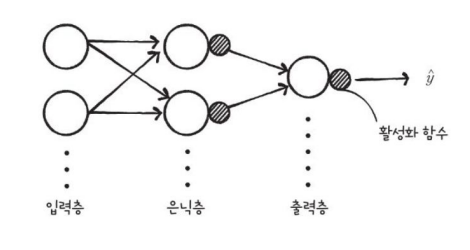

여기서 은닉층 없이 입력층과 출력층만 가지는 신경망을 `단일층 신경망`이라고 부름  
입력층은 입력 그 자체여서 프로그램을 구현할 때 겉으로 드러나진 않지만, 용어를 이해하고 넘어가는 것이 중요

## 손실함수의 결과값 저장 기능 추가하기

In [9]:
class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b # 직선 방정식 계산
    return z

  def backprop(self, x, err):
    w_grad = x * err        # 가중치에 대한 그레이디언트 계산
    b_grad = 1 * err        # 절편에 대한 그레이디언트 계산
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])    # 가중치 초기화
    self.b = 0                      # 절편 초기화
    for i in range(epochs):         # epochs 만큼 반복
      loss = 0
      indexes = np.random.permutation(np.arange(len(x))) # index를 섞음
      for i in indexes:             # 모든 샘플에 대해 반복
        z = self.forpass(x[i])      # 정방향 계산
        a = self.activation(z)      # 활성화 함수 적용
        err = -(y[i] - a)           # 오차 계산
        w_grad, b_grad = self.backprop(x[i], err)        #  역방향 계산
        self.w -= w_grad            # 가중치 업데이트
        self.b -= b_grad            # 절편 업데이트
        a = np.clip(a, 1e-10, 1-1e-10)                     # 안전한 로그 계산을 위해 클리핑한 후 손실을 누적
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))  # epochs마다 평균 손실 저장

      self.losses.append(loss/len(y))

  def activation(self, z):
    z = np.clip(z, -100, None)
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

## 단일층 신경만 훈련하기

In [10]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.7280701754385965

## 손실 함수 누적값 확인하기

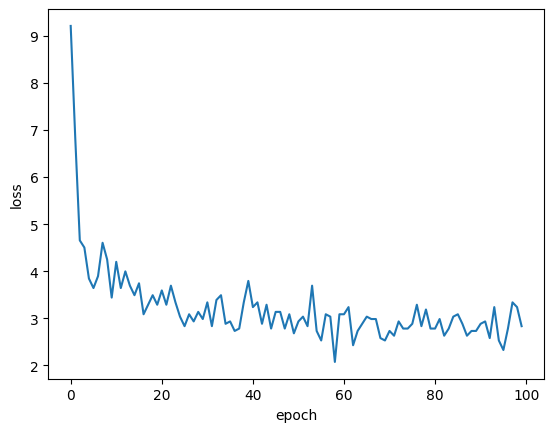

In [11]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 사이킷런으로 경사 하강법 적용


In [12]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3, random_state=42)
# max_iter : 반복 횟수
# random_state : 난수 초깃값 (결과가 동일하게 재현됨)
# tol : 반복할 때 마다 로지스틱 손실 함수의 값이 tol에 지정된 값만큼 감소됨

## 사이킷런으로 훈련하고 평가하기

In [13]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

## 사이킷런으로 예측하기

In [15]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])